# Anova, Fitting Models To Data & Goodness of Fit, Exploratory Data Analysis Using Python Statsmodel


## Fitting model to Data

Standard imports

In [1]:
import math
import io

In [36]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as pp

%matplotlib inline

In [37]:
matplotlib.rcParams['figure.figsize'] = [12, 12]

In [38]:
# !pipenv install statsmodels

In [39]:
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [40]:
gapminder = pd.read_csv('data/gapminder.xls')

In [41]:
gdata = gapminder.query('year == 1985')

In [42]:
gdata.head()

,country,year,region,population,life_expectancy,age5_surviving,babies_per_woman,gdp_per_capita,gdp_per_day
50,Afghanistan,1985,Asia,11630498.0,45.21,78.400,7.68,1384.0,3.789185
131,Albania,1985,Europe,2966799.0,72.71,94.570,3.23,4267.0,11.682409
212,Algeria,1985,Africa,22565908.0,67.18,92.880,5.98,11030.0,30.198494
293,Angola,1985,Africa,9745209.0,47.50,77.170,7.21,4117.0,11.271732
374,Antigua and Barbuda,1985,America,65744.0,72.13,96.946,2.09,11383.0,31.164956


In [43]:
size = 1e-6 * gdata.population

colors = gdata.region.map({
    'Africa': 'skyblue', 
    'Europe': 'gold',
    'America': 'palegreen',
    'Asia': 'coral'
})

def plotdata():
    gdata.plot.scatter(
        'age5_surviving',
        'babies_per_woman',
        c=colors,
        s=size,
        linewidths=0.5,
        edgecolor='k',
        alpha=0.5
    )

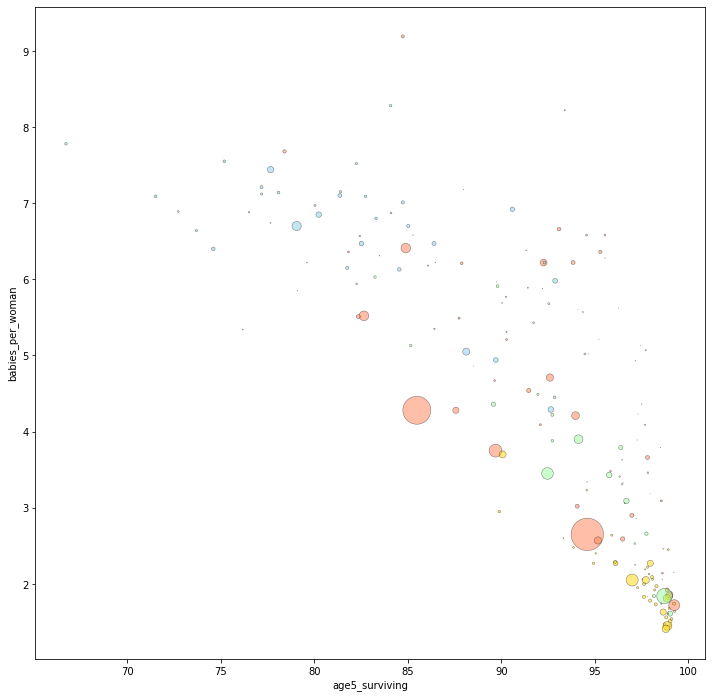

In [44]:
plotdata()

In [45]:
model = smf.ols(formula='babies_per_woman ~ 1', data=gdata)

In [46]:
grandmean = model.fit()

In [47]:
grandmean

In [48]:
def plotfit(fit):
    plotdata()
    pp.scatter(
        gdata.age5_surviving, 
        fit.predict(gdata),
        c=colors,
        s=30,
        linewidths=0.5,
        edgecolors='k',
        marker='D'
    )


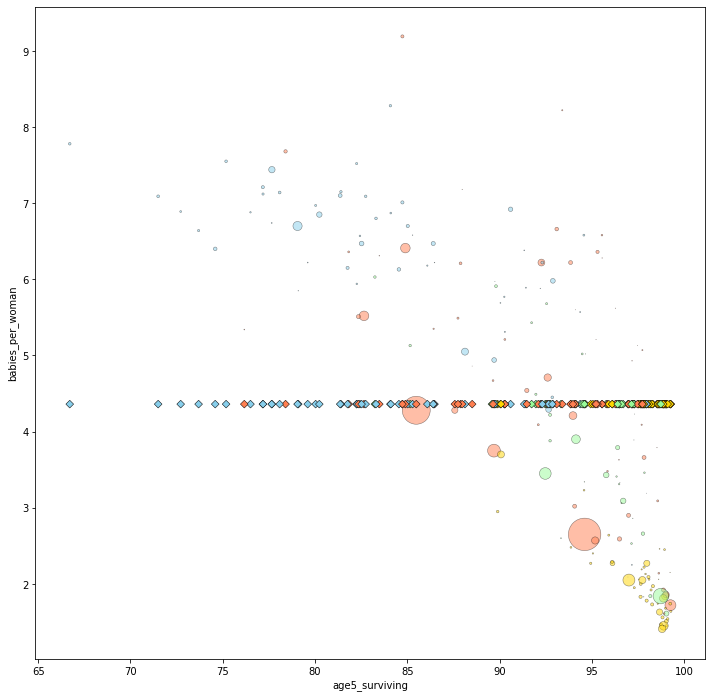

In [49]:
plotfit(grandmean)

In [50]:
grandmean.params

Intercept    4.360714
dtype: float64

In [51]:
gdata.babies_per_woman.mean()

4.360714285714287

In [52]:
groupmeans = smf.ols(
    formula='babies_per_woman ~ 1 + region', 
    data=gdata
).fit()

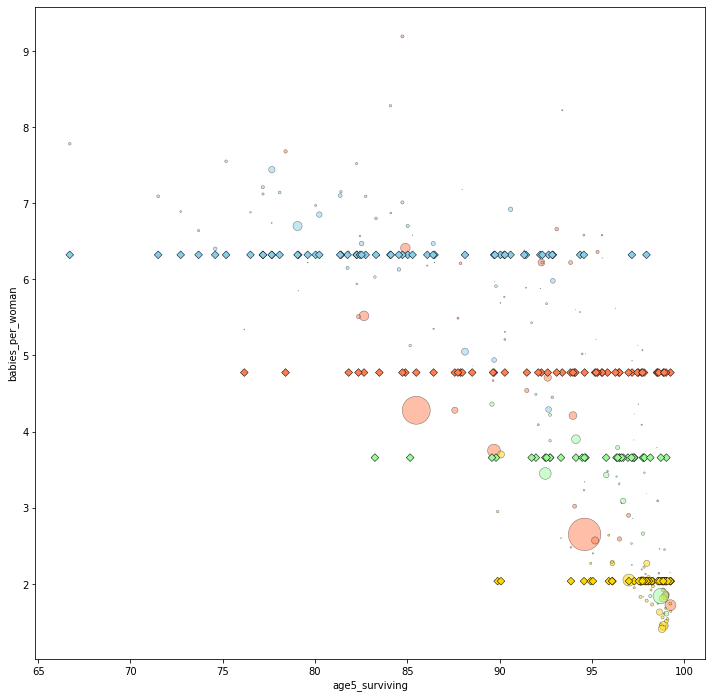

In [53]:
plotfit(groupmeans)

In [54]:
groupmeans.params

Intercept            6.321321
region[T.America]   -2.663139
region[T.Asia]      -1.545744
region[T.Europe]    -4.285639
dtype: float64

In [55]:
groupmeans = smf.ols(
    formula='babies_per_woman ~ -1 + region', 
    data=gdata
).fit()

In [56]:
groupmeans.params

region[Africa]     6.321321
region[America]    3.658182
region[Asia]       4.775577
region[Europe]     2.035682
dtype: float64

In [57]:
gdata.groupby('region').babies_per_woman.mean()

region
Africa     6.321321
America    3.658182
Asia       4.775577
Europe     2.035682
Name: babies_per_woman, dtype: float64

In [58]:
surviving = smf.ols(
    formula='babies_per_woman ~ -1 + region + age5_surviving', 
    data=gdata
).fit()

In [59]:
surviving.params

region[Africa]     18.265792
region[America]    17.085884
region[Asia]       17.864741
region[Europe]     15.872183
age5_surviving     -0.141886
dtype: float64

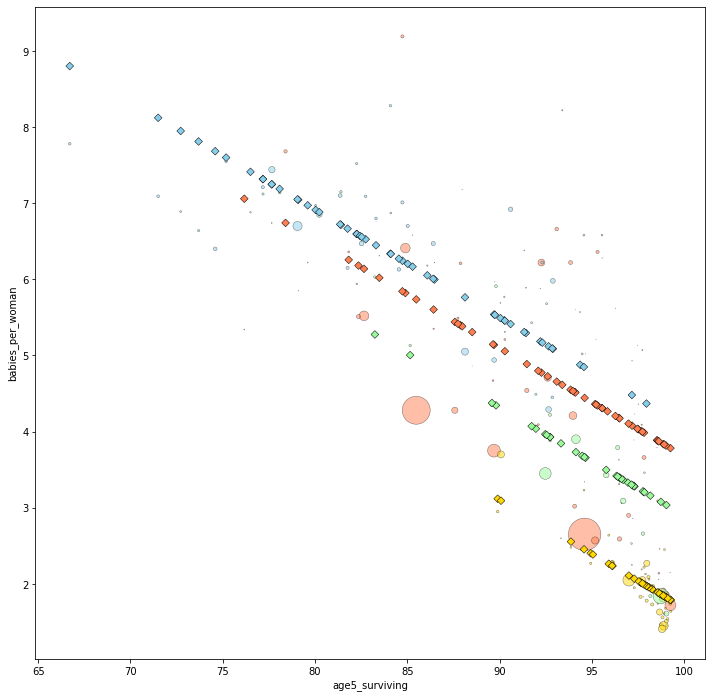

In [60]:
plotfit(surviving)

In [61]:
surviving_byregion = smf.ols(
    formula='babies_per_woman ~ -1 + region + age5_surviving:region', 
    data=gdata
).fit()

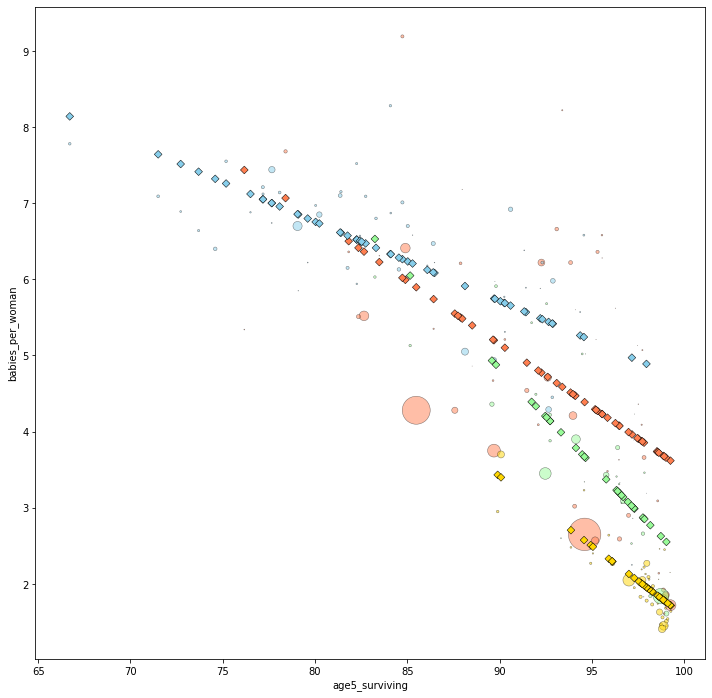

In [62]:
plotfit(surviving_byregion)

In [63]:
surviving_byregion.params

region[Africa]                    15.080914
region[America]                   27.506243
region[Asia]                      20.032483
region[Europe]                    19.884446
age5_surviving:region[Africa]     -0.104053
age5_surviving:region[America]    -0.251994
age5_surviving:region[Asia]       -0.165384
age5_surviving:region[Europe]     -0.183029
dtype: float64

In [64]:
surviving_byregion_population = smf.ols(
    formula='babies_per_woman ~ -1 + region + age5_surviving:region + population', 
    data=gdata
).fit()

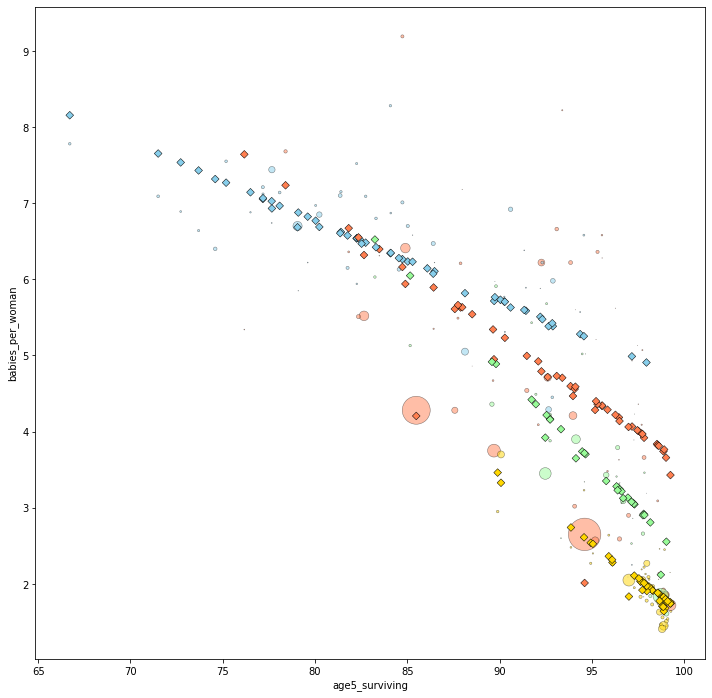

In [65]:
plotfit(surviving_byregion_population)

In [66]:
surviving_byregion_population.params

region[Africa]                    1.513953e+01
region[America]                   2.721512e+01
region[Asia]                      2.060924e+01
region[Europe]                    1.997501e+01
age5_surviving:region[Africa]    -1.044609e-01
age5_surviving:region[America]   -2.484114e-01
age5_surviving:region[Asia]      -1.702392e-01
age5_surviving:region[Europe]    -1.835316e-01
population                       -2.367914e-09
dtype: float64

## Goodness Of Fit

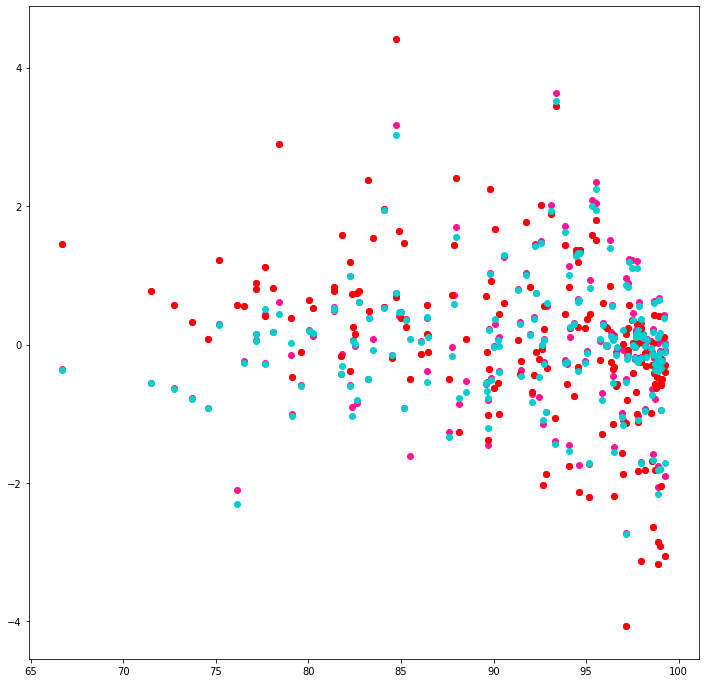

In [88]:
pp.scatter(gdata.age5_surviving, groupmeans.resid, c='#ff1493')
pp.scatter(gdata.age5_surviving, surviving_byregion.resid, c='#ff1493')
pp.scatter(gdata.age5_surviving, groupmeans.resid, c='#ff0000')
pp.scatter(gdata.age5_surviving, surviving_byregion_population.resid, c='#00ced1')

In [71]:
for model in (groupmeans, surviving, surviving_byregion, surviving_byregion_population):
    print(model.mse_resid)

1.4979520263709156
0.9423025333008321
0.8995512597945946
0.8480227300570335


In [89]:
for model in (groupmeans, surviving, surviving_byregion, surviving_byregion_population):
    print(model.rsquared)

0.6364676965596588
0.7726009080146058
0.7865971252318769
0.7999775707885214


In [92]:
for model in (groupmeans, surviving, surviving_byregion, surviving_byregion_population):
    print(model.fvalue)

103.88003937611684
150.3418060343098
91.622744698973
86.4878755672517


In [93]:
surviving.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       babies_per_woman   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     150.3
Date:                Tue, 14 Jan 2020   Prob (F-statistic):           8.26e-56
Time:                        11:11:40   Log-Likelihood:                -250.30
No. Observations:                 182   AIC:                             510.6
Df Residuals:                     177   BIC:                             526.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
region[Africa]     18.2658      1.168     15.639      0.000      15.961      20.571
region[America]    17.0859      1.315     12.990      0.000      14.490      19.682
region[Asia]       17.8647      1.279     13.971      0.000      15.341      20.388
region[Europe]     15.8722      1.352     11.739      0.000      13.204      18.541
age5_surviving     -0.1419      0.014    -10.294      0.000      -0.169      -0.115
==============================================================================
Omnibus:                       13.021   Durbin-Watson:                   1.947
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.362
Skew:                           0.443   Prob(JB):                     0.000103
Kurtosis:                       4.279   Cond. No.                     3.25e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.25e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [94]:
surviving_byregion_population.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       babies_per_woman   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     86.49
Date:                Tue, 14 Jan 2020   Prob (F-statistic):           2.08e-56
Time:                        11:11:57   Log-Likelihood:                -238.63
No. Observations:                 182   AIC:                             495.3
Df Residuals:                     173   BIC:                             524.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
region[Africa]                    15.1395      1.534      9.870      0.000      12.112      18.167
region[America]                   27.2151      4.179      6.513      0.000      18.967      35.463
region[Asia]                      20.6092      2.038     10.111      0.000      16.586      24.632
region[Europe]                    19.9750      6.417      3.113      0.002       7.310      32.640
age5_surviving:region[Africa]     -0.1045      0.018     -5.753      0.000      -0.140      -0.069
age5_surviving:region[America]    -0.2484      0.044     -5.629      0.000      -0.336      -0.161
age5_surviving:region[Asia]       -0.1702      0.022     -7.730      0.000      -0.214      -0.127
age5_surviving:region[Europe]     -0.1835      0.066     -2.790      0.006      -0.313      -0.054
population                     -2.368e-09   6.96e-10     -3.402      0.001   -3.74e-09   -9.94e-10
==============================================================================
Omnibus:                       14.326   Durbin-Watson:                   1.939
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               28.310
Skew:                           0.346   Prob(JB):                     7.12e-07
Kurtosis:                       4.804   Cond. No.                     9.72e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.72e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [96]:
sm.stats.anova_lm(groupmeans)

,df,sum_sq,mean_sq,F,PR(>F)
region,4.0,3927.702839,981.925710,655.512121,2.604302e-105
Residual,178.0,266.635461,1.497952,NaN,NaN


In [97]:
sm.stats.anova_lm(surviving)

,df,sum_sq,mean_sq,F,PR(>F)
region,4.0,3927.702839,981.925710,1042.049316,8.236854e-122
age5_surviving,1.0,99.847912,99.847912,105.961630,9.003514e-20
Residual,177.0,166.787548,0.942303,NaN,NaN


In [98]:
sm.stats.anova_lm(surviving_byregion)

,df,sum_sq,mean_sq,F,PR(>F)
region,4.0,3927.702839,981.925710,1091.572825,4.888881e-122
age5_surviving:region,4.0,110.113541,27.528385,30.602353,2.757693e-19
Residual,174.0,156.521919,0.899551,NaN,NaN


In [99]:
sm.stats.anova_lm(surviving_byregion_population)

,df,sum_sq,mean_sq,F,PR(>F)
region,4.0,3927.702839,981.925710,1157.900225,1.132132e-123
age5_surviving:region,4.0,110.113541,27.528385,32.461848,3.514845e-20
population,1.0,9.813987,9.813987,11.572788,8.313090e-04
Residual,173.0,146.707932,0.848023,NaN,NaN
